<a href="https://colab.research.google.com/github/AteneaCB/Python/blob/main/M4Sesi%C3%B3n6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**Módulo 4**
**Sesión 6. Visualización de Datos Avanzada**

- Aprender a modificar los estilos predeterminados de nuestras gráficas

Temas pendientes de sesión pasada:
a) Gráficas -interactivas-

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes-clean.csv', index_col=0)
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Limpieza de datos
df = df[df['glucose'] !=0]
df = df[df['skin_thickness'] !=0]
df = df[df['insulin'] !=0]

**b) Modelo split**

División entre train y test

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['glucose', 'skin_thickness']]
y= df['insulin']

In [ ]:
#1. Modelo método Split
#Datos aleatorios para modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.score(X_test, y_test)

0.33535653630675244

In [ ]:
#Para gráficas interactivas cuando se corre en Jupyter local, en Colab no permite interactivo
#%matplotlib notebook #Don't run in Colab

In [ ]:
from mpl_toolkits.mplot3d import Axes 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['glucose']
y = df['skin_thickness']
z = df['insulin']

ax.set_xlabel('Glucosa')
ax.set_ylabel('Piel')
ax.set_zlabel('Insulina')

ax.scatter(x, y, z)
z2 = lr.predict(X)
ax.scatter(x,y,z2, c='r')


**c) Cross-validate**

Por defecto la validación se hace dividiendo en 5 pero con cv se determina el número de elementos a dividir

In [ ]:
from sklearn.model_selection import cross_validate
X = df[['glucose', 'skin_thickness']]
y= df['insulin']

In [ ]:
lr = LinearRegression()

In [ ]:
scores = cross_validate(lr, X, y, scoring='r2')
scores
#Fit_time: tiempo que necesitó para correr el fit (aplicar la linea)
#Score_time: Tiempo que tardó en calcular el error

{'fit_time': array([0.00599551, 0.00158906, 0.00144815, 0.00141931, 0.00136471]),
 'score_time': array([0.00114417, 0.00087404, 0.00085974, 0.00083065, 0.00082731]),
 'test_score': array([0.38461236, 0.35946538, 0.37281425, 0.13954818, 0.28038867])}

In [ ]:
print(f'Score del modelo: {scores["test_score"].mean()} +/- {scores["test_score"].std():.3f}')
#El predictor es demasiado bajo, no tiene capacidad para predecir

Score del modelo: 0.3073657692209797 +/- 0.091


In [ ]:
#Para cambiar el número de iteraciones
scores = cross_validate(lr, X, y, scoring='r2', cv=4)
scores

{'fit_time': array([0.00267196, 0.00232744, 0.00190258, 0.00186777]),
 'score_time': array([0.00148988, 0.00104904, 0.00106478, 0.0010221 ]),
 'test_score': array([0.38247191, 0.40590883, 0.21698481, 0.22423326])}

In [ ]:
print(f'Score del modelo: {scores["test_score"].mean()} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.3073996999967852 +/- 0.087


**Ejemplo 1**
Estilos

- Aprender a aplicar estilos predefinidos de matplotlib y seaborn

In [ ]:
#Base de datos de Casas de Merbourne
df = pd.read_csv('/content/drive/MyDrive/Datasets/melbourne_housing-clean.csv', index_col=0)
df.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


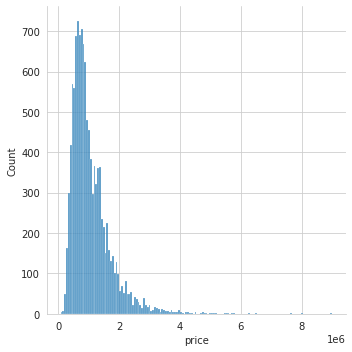

In [ ]:
#Con seaborn
sns.set_style('whitegrid')
sns.displot(df['price']);

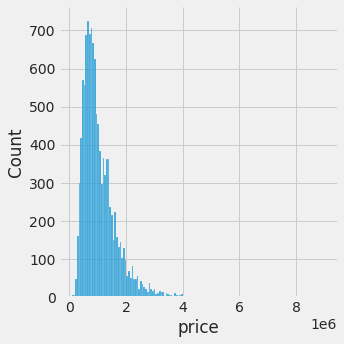

In [ ]:
#Con matplotlib
plt.style.use('fivethirtyeight')
sns.displot(df['price']);

**Ejemplo 2**
Treemaps

- Aprender a generar e interpretar treemaps

Útil para visualizar jerarquías

In [ ]:
#Librería Plotly (creada por empresa, algunos features son de paga)
import plotly.express as px

In [ ]:
#Solicita actualizar desde consola
!pip install plotly --upgrade

     |████████████████████████████████| 13.2MB 282kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
fig = px.treemap(
    names=['A', 'B', 'C', 'D', 'E', 'a', 'b', 'c', 'd', 'x', 'y', 'z'],
    parents=['', '',  '',  '',  '', 'A', 'B', 'B', 'E', 'b', 'a', 'd']
)

fig.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/athlete_olympic_events-clean.csv', index_col=0)
df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


In [ ]:
df_grouped = df.groupby('name')[['sex', 'sport']].max()
df_grouped.head()

,sex,sport
name,,
Th Anh,F,Fencing
Th Ngn Thng,F,Gymnastics
Tin Tun,M,Boxing
A Dijiang,M,Basketball
A Lamusi,M,Judo


In [ ]:
#Asignar "peso" de los elementos, cuanto vale cada uno
df_grouped['count'] = 1

In [ ]:
fig = px.treemap(
    df_grouped, path=['sport', 'sex'], values='count'
)

fig.show()

In [ ]:
#Ahora, treemap por género primero y después por deporte
fig = px.treemap(
    df_grouped, path=['sex', 'sport'], values='count'
)

fig.show()

**Reto 1**
Treemaps

- Aprender a generar e interpretar treemaps

**a) Uso de tierra de distintos tipos de propiedades en Melbourne, Australia**

Para este Reto vamos a usar nuestro dataset 'melbourne_housing-clean.csv'. Queremos usar un Treemap para visualizar el uso de tierra de los distintos tipos de propiedades agrupados por región. El treemap tiene que tener las siguientes características:

1. Debe de tener un primer nivel superior que tenga como valor el nombre de la ciudad: 'Melbourne'. Obviamente, todos los demás niveles estarán contenidos dentro de este primer nivel.
1. Para los niveles inferiores, los datos deberán de ser agrupados utilizando el nombre de la región y después el tipo de propiedad ('region_name' y 'type').
1. El valor que vamos a utilizar para determinar el tamaño de los rectángulos en el treemap va a ser el de tamaño de tierra o 'land_size'.

In [ ]:
df_mel = pd.read_csv("/content/drive/MyDrive/Datasets/melbourne_housing-clean.csv", index_col=0)
df_mel.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
import numpy as np

In [ ]:
#Treemap directo
df_mel["Melbourne"] = "Melbourne" # in order to have a single root node
fig = px.treemap(
    df_mel, path=['Melbourne', 'region_name', 'type'], values='land_size',
                  color='distance', hover_data=['suburb'],
                  color_continuous_scale='RdBu',
                 color_continuous_midpoint=np.average(df_mel['distance'], weights=df_mel['land_size']))
fig.show()

In [ ]:
#Groupby
df_mel_group = df_mel.groupby(['Melbourne','type'], as_index=False).agg(count=('land_size', 'sum'))
df_mel_group['city'] = 'Melbourne'
df_mel_group.head()

,region_name,type,count,city
0,Eastern Metropolitan,h,640076.0,Melbourne
1,Eastern Metropolitan,t,36518.0,Melbourne
2,Eastern Metropolitan,u,56731.0,Melbourne
3,Eastern Victoria,h,147122.0,Melbourne
4,Eastern Victoria,u,2511.0,Melbourne


In [ ]:
#Treemap con groupby
fig = px.treemap(
    df_mel_group, path=['city','region_name', "type"], values='count'
)

fig.show()

**Ejemplo 3**
Scatterplots por categoría

- Aprender a generar e interpretar scatterplots por categorías

In [ ]:
#DF de Olympics, Group by
df_grouped = df.groupby('name')[['height', 'weight', 'sex', 'team', 'sport']].max()

In [ ]:
np.unique(df_grouped['sport'], return_index=False, return_inverse=False, return_counts=True, axis=None) 

(array(['Alpine Skiing', 'Archery', 'Art Competitions', 'Athletics',
        'Badminton', 'Baseball', 'Basketball', 'Beach Volleyball',
        'Biathlon', 'Bobsleigh', 'Boxing', 'Canoeing',
        'Cross Country Skiing', 'Curling', 'Cycling', 'Diving',
        'Equestrianism', 'Fencing', 'Figure Skating', 'Football',
        'Freestyle Skiing', 'Golf', 'Gymnastics', 'Handball', 'Hockey',
        'Ice Hockey', 'Judo', 'Lacrosse', 'Luge', 'Modern Pentathlon',
        'Motorboating', 'Nordic Combined', 'Rhythmic Gymnastics', 'Rowing',
        'Rugby', 'Rugby Sevens', 'Sailing', 'Shooting',
        'Short Track Speed Skating', 'Skeleton', 'Ski Jumping',
        'Snowboarding', 'Softball', 'Speed Skating', 'Swimming',
        'Synchronized Swimming', 'Table Tennis', 'Taekwondo', 'Tennis',
        'Trampolining', 'Triathlon', 'Tug-Of-War', 'Volleyball',
        'Water Polo', 'Weightlifting', 'Wrestling'], dtype=object),
 array([ 1728,   833,     7, 17969,   733,   703,  2607,   336,   925,

In [ ]:
#Agrupar por deporte utilizando isin como OR
df_sport = df_grouped[df_grouped['sport'].isin(['Basketball', 'Volleyball', 'Football', 'Baseball'])]
df_sport.head()

,height,weight,sex,team,sport
name,,,,,
A Dijiang,180.0,80.0,M,China,Basketball
Aafke Hament,181.0,64.0,F,Netherlands,Volleyball
Aarn Galindo Rubio,182.0,80.0,M,Mexico,Football
Aaron Duane Olson,195.0,90.0,M,New Zealand,Basketball
Aaron James Ramsey,178.0,70.0,M,Great Britain,Football


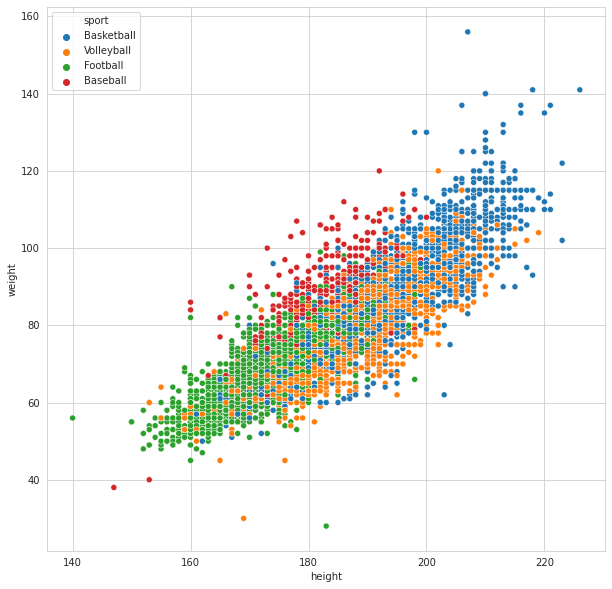

In [ ]:
#Scatterplot
# Con hue se pasa color diferente por cada elemento
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

sns.scatterplot(x=df_sport['height'], y=df_sport['weight'], hue=df_sport['sport'], ax=ax)

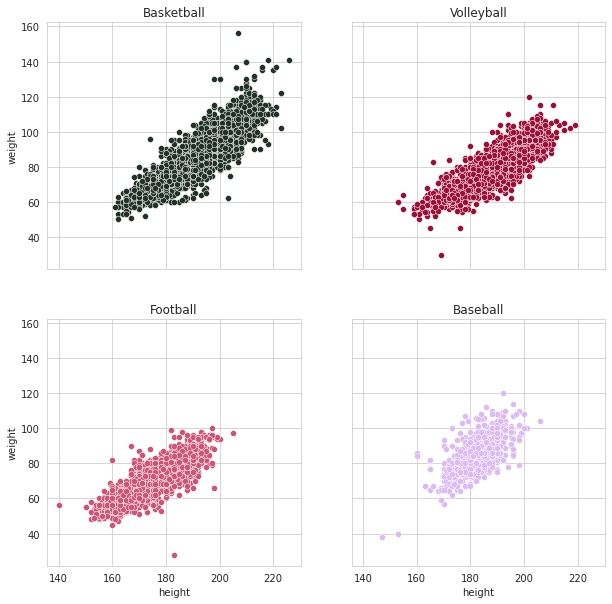

In [ ]:
sns.set_style('whitegrid')
#Palette de colores en hexadecimal
palette = ["#223127","#9c0d38","#ce5374","#dbbbf5","#F9A03F"]

fig = plt.figure(figsize=(10,10))
axes = fig.subplots(2,2, sharex=True, sharey=True)

#Dividir DF
basket = df_sport[df_sport['sport'] == 'Basketball']
volley = df_sport[df_sport['sport'] == 'Volleyball']
foot = df_sport[df_sport['sport'] == 'Football']
beis = df_sport[df_sport['sport'] == 'Baseball']

sns.scatterplot(x=basket['height'], y=basket['weight'], ax=axes[0,0], color=palette[0])
sns.scatterplot(x=volley['height'], y=volley['weight'], ax=axes[0,1], color=palette[1])
sns.scatterplot(x=foot['height'], y=foot['weight'], ax=axes[1,0], color=palette[2])
sns.scatterplot(x=beis['height'], y=beis['weight'], ax=axes[1,1], color=palette[3])

axes[0,0].set_title('Basketball')
axes[0,1].set_title('Volleyball')
axes[1,0].set_title('Football')
axes[1,1].set_title('Baseball');

In [ ]:
foot.head()

,height,weight,sex,team,sport
name,,,,,
Aarn Galindo Rubio,182.0,80.0,M,Mexico,Football
Aaron James Ramsey,178.0,70.0,M,Great Britain,Football
Aaron James Scott,177.0,72.0,M,New Zealand,Football
Aaron Teboho Mokoena,178.0,78.0,M,South Africa,Football
Abbubaker Mobara,175.0,64.0,M,South Africa,Football


**Ejemplo 6**

Cloropléticos

-Tipos de archivo GeoJSON
-Librería folium

In [ ]:
#Importar librería
import folium

In [ ]:
#Data GeoJSON
estados = 'https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020-Santander/main/Datasets/us_states.json'
desempleo = 'https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020-Santander/main/Datasets/us_unemployment-oct_2012.csv'

df= pd.read_csv(desempleo)

In [ ]:
#Guardar variable "m" para utilizar folium: punto medio, zoom de inicio, tamaño expresado como porcentaje
m = folium.Map(location=[48, -120], zoom_start=3, width='60%', height='60%')

folium.Choropleth(
    geo_data=estados,
    name = 'desempleo',
    data = df,
    columns =['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Desempleo %"
).add_to(m)

m
#Notación en JSON con punto por ejemplo, elemento parent "Feature" y queremos sacar el "id": feature.id

#folium.LayerControl #Para tener diferentes capas

**Reto 3**
Mapas Cloropléticos

- Aprender a generar e interpretar mapas cloropléticos

**a) Diferencias demográficas a través de la República Mexicana**

Nuestro archivo GeoJSON se llama 'mexico.json' y el dataset con los datos de población por Estado se llama 'poblacion_mexico_2010.csv'.

In [ ]:
#librerías adicionales
!pip install geopandas
import pandas as pd
import geopandas as gpd
import branca.colormap as cm

     |████████████████████████████████| 1.0MB 16.1MB/s 
     |████████████████████████████████| 15.3MB 329kB/s 
     |████████████████████████████████| 6.5MB 50.1MB/s 


In [ ]:
poblacion = 'https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020-Santander/main/Datasets/poblacion_mexico_2010.csv'
mexico = '/content/drive/MyDrive/Datasets/mexico.json'

df_pob = pd.read_csv(poblacion)
df_pob.head()

,Unnamed: 0,estado,poblacion
0,0,Aguascalientes,1184996
1,1,Baja California,3155070
2,2,Baja California Sur,637026
3,3,Campeche,822441
4,4,Coahuila de Zaragoza,2748391


In [ ]:
#Guardar variable "m" para utilizar folium: punto medio, zoom de inicio, tamaño expresado como porcentaje
m = folium.Map(location=[25, -100], zoom_start=4, width='70%', height='60%')

folium.Choropleth(
    geo_data=mexico,
    name = 'poblacion',
    data = df_pob,
    columns =['estado', 'poblacion'],
    key_on="feature.properties.name",
    fill_color='YlGn',
    fill_opacity=0.2,
    line_opacity=0.2,
    legend_name="Población por Estado"
).add_to(m)

m

In [ ]:
#NOTA: Nombres de JSON no coinciden con csv
#Para responsivo se requiere un solo dataframe